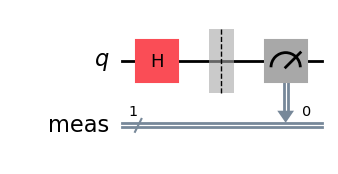

In [43]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

# Quantencircuit erstellen
hadamard_gate = HGate()
circuit = QuantumCircuit(1)
circuit.append(hadamard_gate, [0])
circuit.measure_all()

circuit.draw("mpl")

In [44]:
# Set up different observables.
 
observables_labels = ["I", "Z", "X"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [45]:
 
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = AerSimulator()
estimator = Estimator(backend)
 
# Convert to an ISA circuit and layout-mapped observables.
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]
print(pub_result.data.evs)
print(pub_result.data.stds)
print(backend.num_qubits)

[ 1.         -0.01318359  0.00146484]
[0.         0.01562364 0.01562498]
29


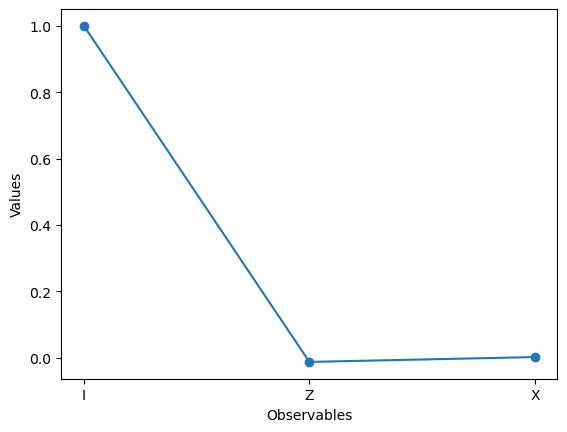

In [46]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

{'0': 494, '1': 530}
Result(backend_name='aer_simulator', backend_version='0.17.1', job_id='06cf3ba3-1580-4515-94a4-061f17a076f8', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 494, '0x1': 530}, memory=['0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '

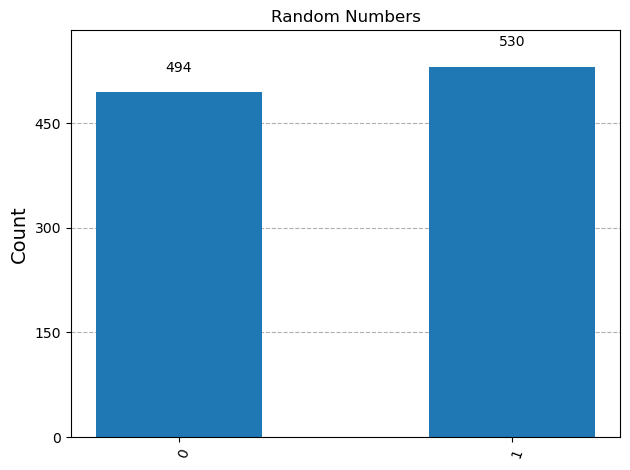

In [57]:
from qiskit.visualization import plot_histogram, plot_state_city

result = backend.run(circuit, shots = 1024, memory = True).result()
counts = result.get_counts(circuit)
print(counts)
print(result)
memory = result.get_memory(circuit)
print(memory)
plot_histogram(counts, title='Random Numbers')